In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

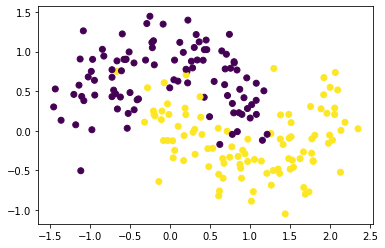

In [2]:
from sklearn.datasets import make_moons
n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy import stats


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [16]:
model = SVC()

In [18]:
model.fit(X_train, y_train)

SVC()

In [19]:
prediction = model.predict(X_test)

In [20]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.99        39

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

[[21  0]
 [ 1 38]]


In [34]:
# Hyperparameter search space
search_space = {
 'kernel': ['sigmoid', 'rbf'],
 'C': [0.01, 0.1, 1,10,100,1000],
 'gamma': [1],
 'coef0': [0]}

In [38]:
grid = GridSearchCV(SVC(),search_space,refit = True, verbose=2,cv=3,scoring='accuracy')


In [41]:
grid.fit(X,y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...........C=0.01, coef0=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.01, coef0=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.01, coef0=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=0.01, coef0=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.01, coef0=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.01, coef0=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, coef0=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ............C=0.1, coef0=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ............C=0.1, coef0=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.1, coef0=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................C=0.1, coef0=0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................C=0.1, coef0=0, gamma=1

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'coef0': [0],
                         'gamma': [1], 'kernel': ['sigmoid', 'rbf']},
             scoring='accuracy', verbose=2)

In [42]:
grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}

In [26]:
model = SVC(C=0.1, coef0= 0, gamma= 10, kernel= 'rbf')

In [27]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        21
           1       1.00      0.51      0.68        39

    accuracy                           0.68        60
   macro avg       0.76      0.76      0.68        60
weighted avg       0.83      0.68      0.68        60

[[21  0]
 [19 20]]
